In [1]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
import pandas as pd
df=pd.read_csv('Loan_Data_614.csv')
df.columns = [x.lower() for x in df.columns]


df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
df.drop(columns=['loan_id'], inplace=True)
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum().sort_values(ascending=False)

credit_history       50
self_employed        32
loanamount           22
dependents           15
loan_amount_term     14
gender               13
married               3
education             0
applicantincome       0
coapplicantincome     0
property_area         0
loan_status           0
dtype: int64

In [4]:
df['credit_history'] = df['credit_history'].astype('object')
df['credit_history'].dtype
#'dependents', 'education'

dtype('O')

In [5]:
null_cols = ['credit_history', 'self_employed', 'loanamount', 'dependents', 'loan_amount_term', 'gender', 'married']

# Imputation loop
for col in null_cols:
    if df[col].dtype == 'object':
        # Impute categorical variables with mode
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Impute numerical variables with mean for non-binary, and mode for binary
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Imputed {col} with mean: {mean_value}")

Imputed credit_history with mode: 1.0
Imputed self_employed with mode: No
Imputed loanamount with mean: 146.41216216216216
Imputed dependents with mode: 0
Imputed loan_amount_term with mean: 342.0
Imputed gender with mode: Male
Imputed married with mode: Yes


In [6]:
# Count Null v
df.isnull().sum().sort_values(ascending=False)

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])
# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])
# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])
df['loan_status'] = df['loan_status'].replace(['Y', 'N'], [1,0])
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['gender'] = df['gender'].replace(['Male', 'Female'], [1,0])
df['married'] = df['married'].replace(['Yes', 'No'], [1,0])
df['property_area'] = df['property_area'].replace(['Urban', 'Semiurban', 'Rural'], [1,2, 3])

df['dependents'] = df['dependents'].replace(['0', '1', '2', '3', '3+'], [0,1,2,3,3])
#'0': 0, '1': 1, '2': 2, '3+': 3 ,
#df['dependents'] = label_encoder.fit_transform(df['dependents'])

df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,3,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,3,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1


In [8]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,3,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,3,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int64  
 1   married            614 non-null    int64  
 2   dependents         614 non-null    int64  
 3   education          614 non-null    int32  
 4   self_employed      614 non-null    int64  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    int64  
 11  loan_status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


<Axes: xlabel='dependents', ylabel='loanamount'>

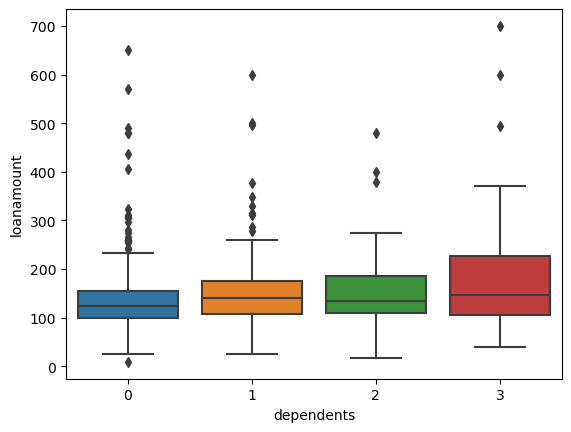

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='dependents', y='loanamount', data=df)

In [11]:
#sns.scatterplot(x='applicantincome', y='loan_amount', hue='loan_status', data=df)

In [12]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [13]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,3,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,3,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,1


In [14]:
# Creating a correlation between the training dataset
corr_matrix = df.corr()
corr_matrix

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.025752,0.017987
married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,-0.004257,0.091478
dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,0.000244,0.010118
education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,0.065243,-0.085884
self_employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,0.030860,-0.003700
applicantincome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.009500,-0.004710
coapplicantincome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.010522,-0.059187
loanamount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,0.044776,-0.036416
loan_amount_term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,0.077620,-0.020974
credit_history,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.001963,0.540556


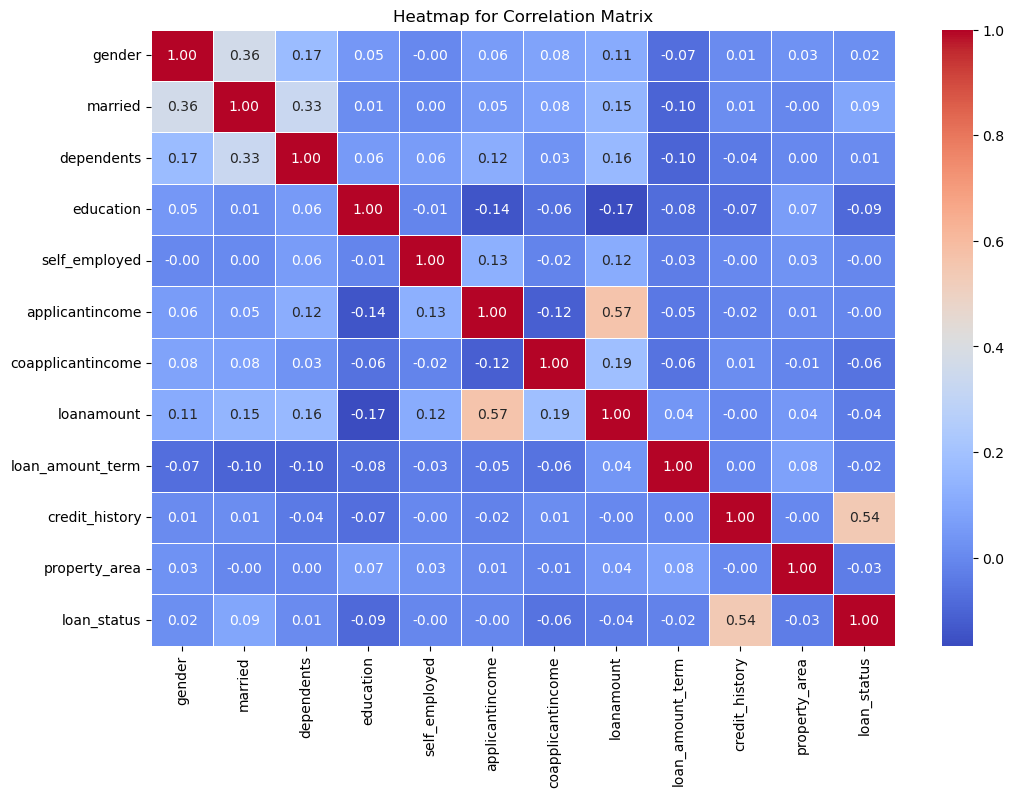

In [15]:
# Plotting Heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap for Correlation Matrix")
plt.show()

In [16]:
import numpy as np
class WOE_Encoder():
    def __init__(self, cols=None, size=None):
            self.cols = cols
            self.min_samples=1
            #self.bins=10000
            self.bins=int(size/5)
            self._mapping = {}
            
    def WOE_fit(self, X, y):
        for col in self.cols:
            X[col]=X[col].fillna(-9999)
            if (len(np.unique(X[col]))>20):
                binned_x = pd.qcut(X[col], self.bins,  duplicates='drop')
                d0 = pd.DataFrame({'x': binned_x, 'y':y})
            else:
                d0 = pd.DataFrame({'x': X[col], 'y': y})
            #print (d0)
            # Share of positive (resp. negative) labels for each category P(X=X_i | Y=1) (resp. P(X=X_i | Y=0))
            #mapping = y.groupby(X[col]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping = y.groupby(d0["x"]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping['neg'] = mapping['count'] - mapping['pos']
            mapping[['pos', 'neg']] /= mapping[['pos', 'neg']].sum()
            # For corner cases, defaulting to WOE = 0 (meaning no info). To avoid division by 0 we use default values.
            undef = (mapping['count'] < self.min_samples) | (mapping['pos'] == 0) | (mapping['neg'] == 0)
            mapping.loc[undef, ['pos', 'neg']] = -1
            # Final step, log of ratio of probabily estimates
            mapping['value'] = np.log((mapping['pos'] +0.0001)/ (mapping['neg']+0.0001))
            self._mapping[col] = mapping
            

        X_encoded = X.copy(deep=True)
        for col, mapping in self._mapping.items():
            X_encoded.loc[:, col] = X_encoded[col].fillna(-9999).map(mapping['value'])
            X_encoded[col].fillna(0, inplace=True)
             
        return X_encoded 

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
y = df['loan_status']  # Target variable
x = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns



# Select only the numerical columns for scaling (excluding 'loan_status')
#numerical_columns = [ 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
#                      'bank_asset_value']

#numerical_columns = [ 'no_of_dependents', 'education', 'self_employed', 'income_annum',
#                      'loan_amount', 'loan_term', 'cibil_score','residential_assets_value',
#                     'commercial_assets_value','luxury_assets_value', 'bank_asset_value']




 

num_df = x.select_dtypes(include=['float64', 'int64', 'int32']).copy()
cat_df = x.select_dtypes(include=['object']).copy()
categorical_cols = cat_df.columns.tolist()
numerical_columns=num_df.columns.tolist()
all_columns=x.columns.tolist()
print(all_columns)
print(numerical_columns)


# Select only the numerical columns for scaling (excluding 'loan_status')
all_columns = [ 'gender', 'married', 'dependents', 'education', 'self_employed','applicantincome', 'coapplicantincome','loanamount','loan_amount_term', 'credit_history', 'property_area']
                     
#numerical_columns= ['applicantincome', 'coapplicantincome', 'loanamount', 'credit_history',  'loanamount'  ]

 

# Apply scaling to the numerical columns
#x[numerical_columns] = scaler.fit_transform(x[numerical_columns])


# Display the scaled feature variables (X) and the target variable (y)
#print("Scaled Feature Variables (x):")
#print(x.head())

#from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

#enc = WeightOfEvidenceEncoder(cols=numerical_columns)
#x[numerical_columns] = enc.fit_transform(x[numerical_columns], y)
#x.head()

columns_for_trans=numerical_columns

#columns_for_trans=['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Obj = WOE_Encoder(cols=columns_for_trans, size=x[columns_for_trans].shape[0])
x[columns_for_trans] = Obj.WOE_fit(x[columns_for_trans], y)

# Display the scaled feature variables (X) and the target variable (y)
print("aWOE Feature Variables (x):")
print(x.head())


['gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area']
['gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area']
aWOE Feature Variables (x):
     gender   married  dependents  education  self_employed  applicantincome  \
0  0.018387 -0.259046   -0.005508   0.099780       0.003135         0.000000   
1  0.018387  0.148039   -0.181268   0.099780       0.003135        -1.288200   
2  0.018387  0.148039   -0.005508   0.099780      -0.020240        -0.093422   
3  0.018387  0.148039   -0.005508  -0.331889       0.003135         0.000000   
4  0.018387 -0.259046   -0.005508   0.099780       0.003135         0.461709   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0          -0.153328   -0.092500          0.065367        0.540215   
1

In [18]:
x

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,0.018387,-0.259046,-0.005508,0.099780,0.003135,0.000000,-0.153328,-0.092500,0.065367,0.540215,-0.131228
1,0.018387,0.148039,-0.181268,0.099780,0.003135,-1.288200,-0.377630,-0.198878,0.065367,0.540215,-0.321031
2,0.018387,0.148039,-0.005508,0.099780,-0.020240,-0.093422,-0.153328,-1.066012,0.065367,0.540215,-0.131228
3,0.018387,0.148039,-0.005508,-0.331889,0.003135,0.000000,0.000000,0.545877,0.065367,0.540215,-0.131228
4,0.018387,-0.259046,-0.005508,0.099780,0.003135,0.461709,-0.153328,0.000000,0.065367,0.540215,-0.131228
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.080896,-0.259046,-0.005508,0.099780,0.003135,0.590261,-0.153328,-0.377630,0.065367,0.540215,-0.321031
610,0.018387,0.148039,-0.181162,0.099780,0.003135,0.590261,-0.153328,0.306053,-0.128089,0.540215,-0.321031
611,0.018387,0.148039,-0.181268,0.099780,0.003135,0.590261,-0.153328,0.590261,0.065367,0.540215,-0.131228
612,0.018387,0.148039,0.324135,0.099780,0.003135,0.306053,-0.153328,0.509222,0.065367,0.540215,-0.131228


In [19]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=0)


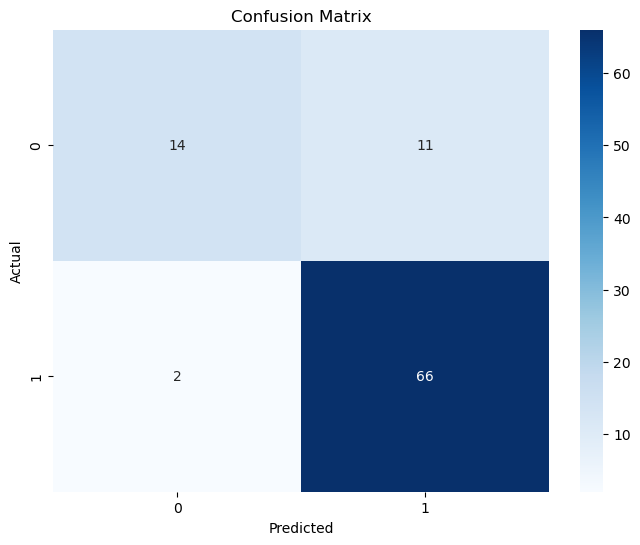

GaussianNB Classifier Metrics:
Accuracy: 0.8602150537634409
Precision: 0.8619431643625192
Recall: 0.8602150537634409
F1 Score: 0.8492109570706385
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.88      0.56      0.68        25
           1       0.86      0.97      0.91        68

    accuracy                           0.86        93
   macro avg       0.87      0.77      0.80        93
weighted avg       0.86      0.86      0.85        93



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB()

# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("GaussianNB Report:\n", classification_rep)

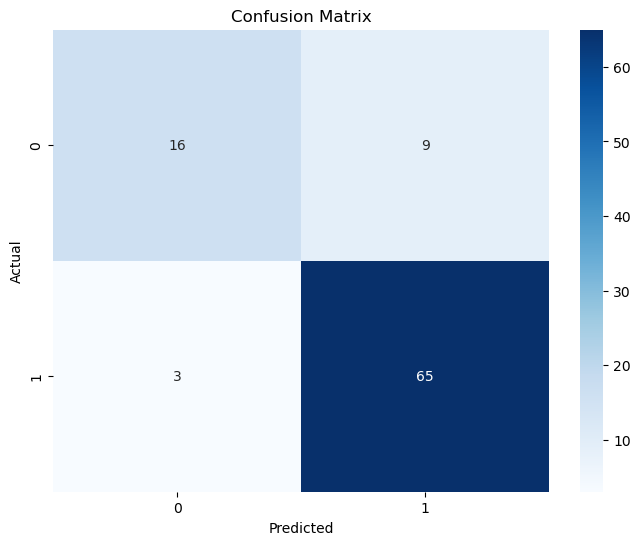

LogisticRegression Classifier Metrics:
Accuracy: 0.8709677419354839
Precision: 0.8686275409535171
Recall: 0.8709677419354839
F1 Score: 0.8648961215976207
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        25
           1       0.88      0.96      0.92        68

    accuracy                           0.87        93
   macro avg       0.86      0.80      0.82        93
weighted avg       0.87      0.87      0.86        93



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

115 77 23 399
pod:  0.9454976303317536
pof:  0.4010416666666667
AUC:  0.7722279818325434
accuracy:  0.8371335504885994


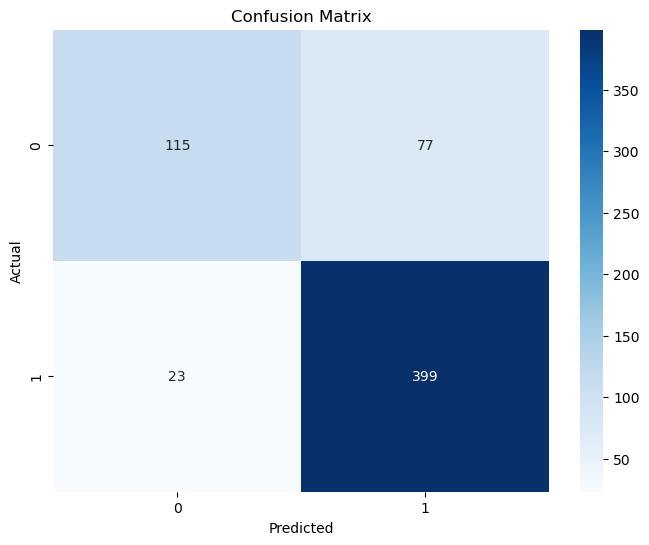

LogisticRegression Classifier Cross-Validation:
Accuracy: 0.8371335504885994
Precision: 0.8367024334163633
Recall: 0.8371335504885994
F1 Score: 0.8287049891411375
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.60      0.70       192
           1       0.84      0.95      0.89       422

    accuracy                           0.84       614
   macro avg       0.84      0.77      0.79       614
weighted avg       0.84      0.84      0.83       614



In [22]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = logistic_reg, X = x, y = y, cv = 10)

tn, fp, fn, tp  = confusion_matrix(y, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Cross-Validation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

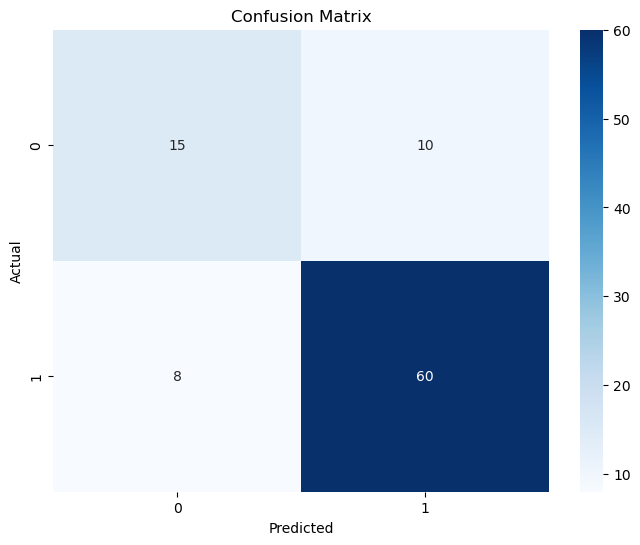

Decision Tree Classifier Metrics:
Accuracy: 0.8064516129032258
Precision: 0.8020436786215188
Recall: 0.8064516129032258
F1 Score: 0.8038218793828893
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.63        25
           1       0.86      0.88      0.87        68

    accuracy                           0.81        93
   macro avg       0.75      0.74      0.75        93
weighted avg       0.80      0.81      0.80        93



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

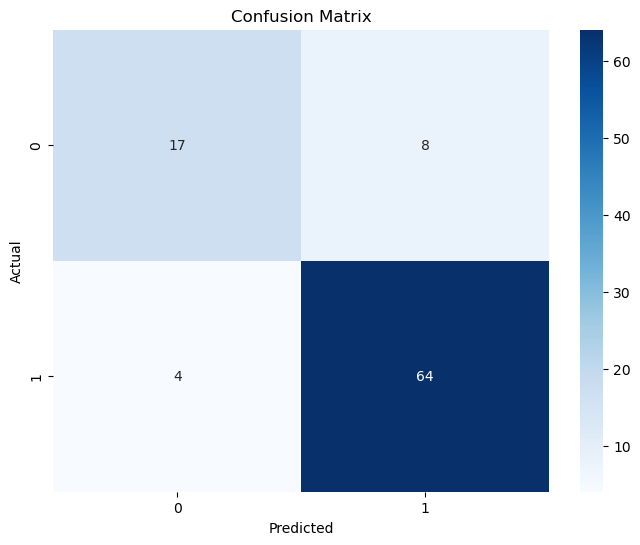

Random Forest Classifier Metrics:
Accuracy: 0.8709677419354839
Precision: 0.8675541901348353
Recall: 0.8709677419354839
F1 Score: 0.867200961731116
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.89      0.94      0.91        68

    accuracy                           0.87        93
   macro avg       0.85      0.81      0.83        93
weighted avg       0.87      0.87      0.87        93



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

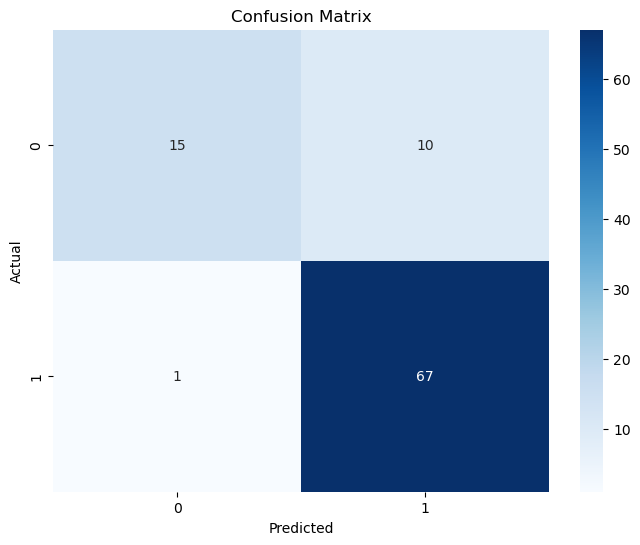

SVM Classifier Metrics:
Accuracy: 0.8817204301075269
Precision: 0.8882401200949587
Recall: 0.8817204301075269
F1 Score: 0.8724092713674635
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73        25
           1       0.87      0.99      0.92        68

    accuracy                           0.88        93
   macro avg       0.90      0.79      0.83        93
weighted avg       0.89      0.88      0.87        93



In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

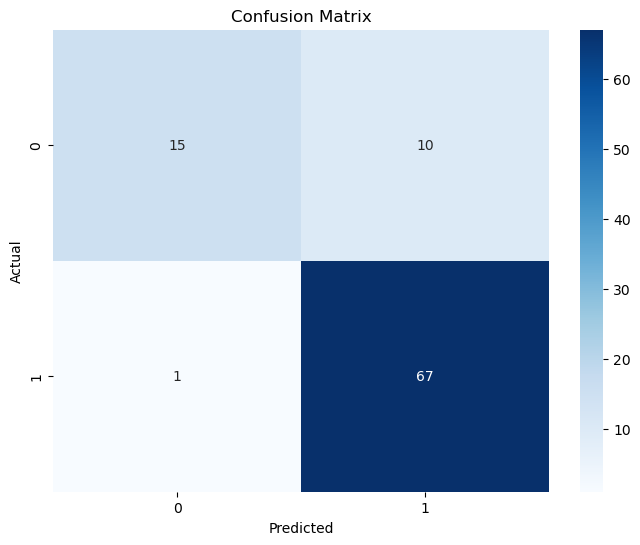

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.8817204301075269
Precision: 0.8882401200949587
Recall: 0.8817204301075269
F1 Score: 0.8724092713674635
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73        25
           1       0.87      0.99      0.92        68

    accuracy                           0.88        93
   macro avg       0.90      0.79      0.83        93
weighted avg       0.89      0.88      0.87        93



In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

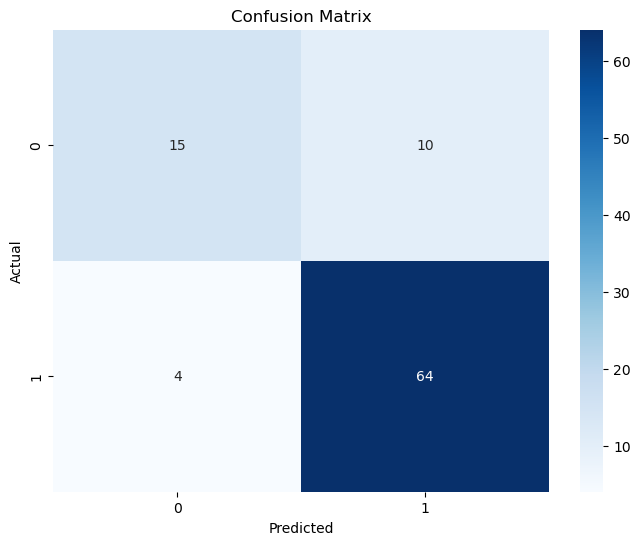

GradientBoosting Classifier Metrics:
Accuracy: 0.8494623655913979
Precision: 0.8445984184524084
Recall: 0.8494623655913979
F1 Score: 0.8423788085305578
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.60      0.68        25
           1       0.86      0.94      0.90        68

    accuracy                           0.85        93
   macro avg       0.83      0.77      0.79        93
weighted avg       0.84      0.85      0.84        93



In [42]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize GradientBoosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train GradientBoosting classifier
gb_clf.fit(x_train, y_train)
  

# Predict on the test set
y_pred = gb_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GradientBoosting Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


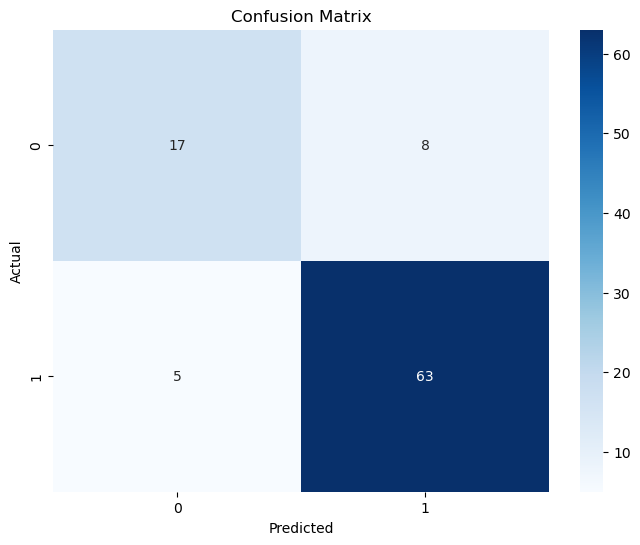

XGBoost Classifier Metrics:
Accuracy: 0.8602150537634409
Precision: 0.8565183869590958
Recall: 0.8602150537634409
F1 Score: 0.8572623027178806
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.89      0.93      0.91        68

    accuracy                           0.86        93
   macro avg       0.83      0.80      0.81        93
weighted avg       0.86      0.86      0.86        93



In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/30
13/13 [==============================] - 1s 13ms/step - loss: 0.5473 - accuracy: 0.7740 - val_loss: 0.4968 - val_accuracy: 0.8000
Epoch 2/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.8053 - val_loss: 0.4589 - val_accuracy: 0.7810
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8293 - val_loss: 0.4525 - val_accuracy: 0.8095
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8173 - val_loss: 0.4469 - val_accuracy: 0.8000
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8245 - val_loss: 0.4423 - val_accuracy: 0.8095
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4005 - accuracy: 0.8149 - val_loss: 0.4417 - val_accuracy: 0.8190
Epoch 7/30
13/13 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.8197 - val_loss: 0.4400 - val_accuracy: 0.8381
Epoch 8/30
13/13 [=

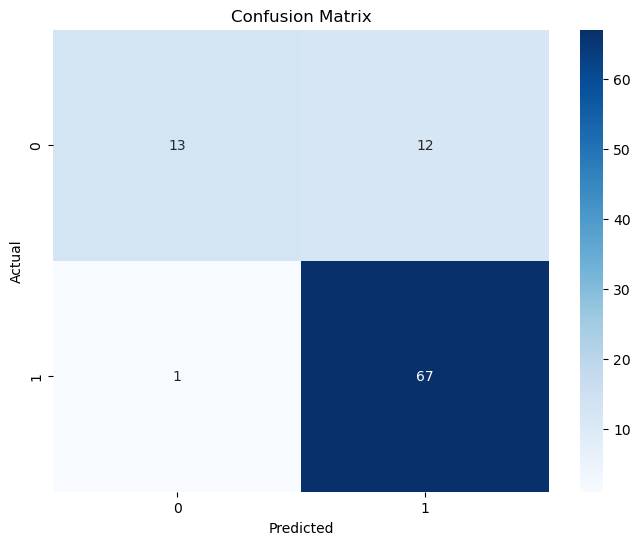

FNN Classifier Metrics:
Accuracy: 0.8602150537634409
Precision: 0.8697330300025277
Recall: 0.8602150537634409
F1 Score: 0.8457318411235462
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        25
           1       0.85      0.99      0.91        68

    accuracy                           0.86        93
   macro avg       0.89      0.75      0.79        93
weighted avg       0.87      0.86      0.85        93



In [28]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/100
17/17 [==============================] - 2s 6ms/step - loss: 0.7434
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4565
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4165
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3616
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3308
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3133
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3218
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2926
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2415
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2790
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2305
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2345
Epoch 13/100
17/17 [=================

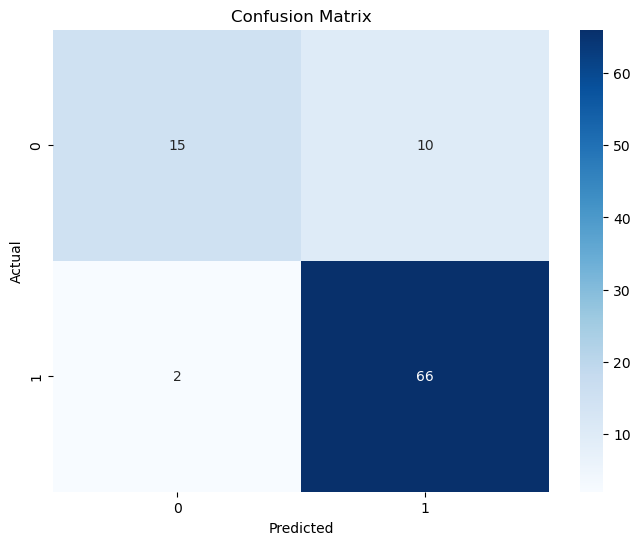

RNN Classifier Metrics:
Accuracy: 0.8709677419354839
Precision: 0.872166183960851
Recall: 0.8709677419354839
F1 Score: 0.86226318484383
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.60      0.71        25
           1       0.87      0.97      0.92        68

    accuracy                           0.87        93
   macro avg       0.88      0.79      0.82        93
weighted avg       0.87      0.87      0.86        93



In [29]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/50
17/17 [==============================] - 4s 11ms/step - loss: 0.3120
Epoch 2/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1817
Epoch 3/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1728
Epoch 4/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1701
Epoch 5/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1635
Epoch 6/50
17/17 [==============================] - 0s 10ms/step - loss: 0.1651
Epoch 7/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1520
Epoch 8/50
17/17 [==============================] - 0s 10ms/step - loss: 0.1452
Epoch 9/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1473
Epoch 10/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1502
Epoch 11/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1464
Epoch 12/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1411
Epoch 13/50
17/17 [==================

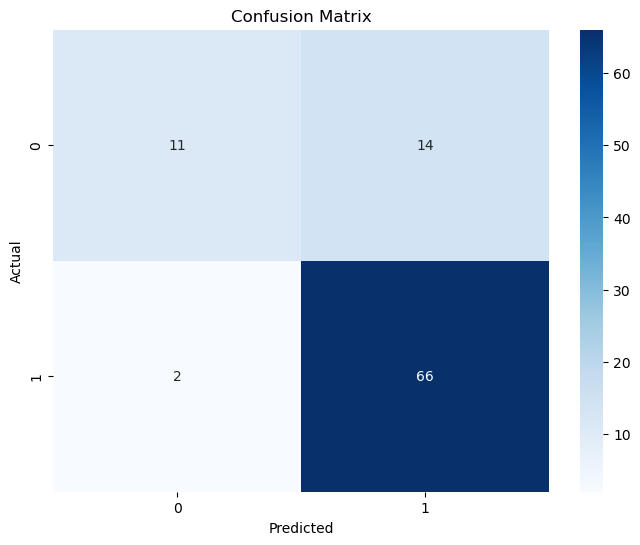

LSTM (beter version of RNN) Classifier Metrics:
Accuracy: 0.8279569892473119
Precision: 0.8306865177832919
Recall: 0.8279569892473119
F1 Score: 0.8077670199911287
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.44      0.58        25
           1       0.82      0.97      0.89        68

    accuracy                           0.83        93
   macro avg       0.84      0.71      0.74        93
weighted avg       0.83      0.83      0.81        93



In [30]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(x_train,y_train,epochs=50,batch_size=32)



  

# Predict on the test set
y_pred = regressor.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LSTM (beter version of RNN) Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


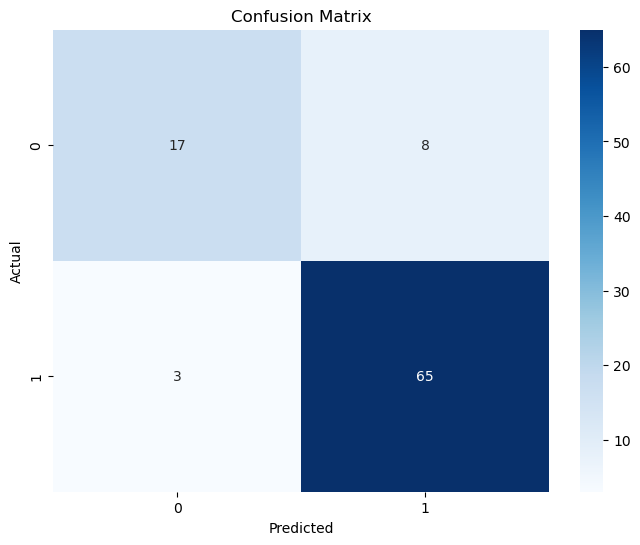

Ensemble Classifier Metrics:
Accuracy: 0.8817204301075269
Precision: 0.8795477979083812
Recall: 0.8817204301075269
F1 Score: 0.8772464983858258
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.89      0.96      0.92        68

    accuracy                           0.88        93
   macro avg       0.87      0.82      0.84        93
weighted avg       0.88      0.88      0.88        93



In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
gaussian_nb = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('svm_classifier', svm_classifier),
    ('logistic_reg', logistic_reg),
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [32]:
# Initialize classifiers
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)

# Train classifiers
logistic_reg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)

# Make predictions
lr_predictions = logistic_reg.predict(x_test)
svm_predictions = svm_classifier.predict(x_test)

# Hybrid prediction
hybrid_predictions = []
for i in range(len(x_test)):
    hybrid_predictions.append(1 if (lr_predictions[i] + svm_predictions[i]) >= 1 else 0)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, lr_predictions)
gb_accuracy = accuracy_score(y_test, svm_predictions)
hybrid_accuracy = accuracy_score(y_test, hybrid_predictions)

print("LogisticRegression Accuracy:", rf_accuracy)
print("SVC Accuracy:", gb_accuracy)
print("Hybrid Classifier Accuracy:", hybrid_accuracy)

LogisticRegression Accuracy: 0.8709677419354839
SVC Accuracy: 0.8817204301075269
Hybrid Classifier Accuracy: 0.8709677419354839


In [33]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model

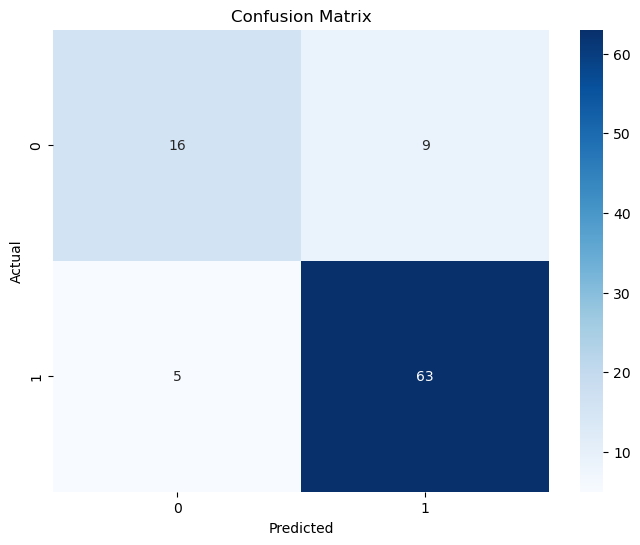

ExtraTrees Classifier Metrics:
Accuracy: 0.8494623655913979
Precision: 0.8445980542754736
Recall: 0.8494623655913979
F1 Score: 0.845067788686302
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.70        25
           1       0.88      0.93      0.90        68

    accuracy                           0.85        93
   macro avg       0.82      0.78      0.80        93
weighted avg       0.84      0.85      0.85        93



In [34]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

et_clf.fit(x_train, y_train)
# Predict on the test set
y_pred = et_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("ExtraTrees Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)


nb_clf.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
logistic_reg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)

# Make predictions
nb_predictions = nb_clf.predict(x_test)
dt_predictions = decision_tree.predict(x_test)
rf_predictions = random_forest.predict(x_test)
lr_predictions=logistic_reg.predict(x_test)
svm_predictions=svm_classifier.predict(x_test)
knn_predictions=knn_classifier.predict(x_test)
# Define weights for classifiers
nb_weight = 0.2
dt_weight = 0.0
rf_weight = 0.0
lr_weight = 0.2
svm_weight = 0.5
knn_weight = 0.0

# Ensemble prediction with weighted average
ensemble_predictions = (lr_weight * lr_predictions) + (nb_weight * nb_predictions)+(svm_weight*svm_predictions)+(knn_weight*knn_predictions)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Classifier Accuracy:", ensemble_accuracy)

Ensemble Classifier Accuracy: 0.8817204301075269


Before OverSampling, counts of label '1': 354
Before OverSampling, counts of label '0': 167 

After OverSampling, the shape of train_X: (708, 11)
After OverSampling, the shape of train_y: (708,) 

After OverSampling, counts of label '1': 354
After OverSampling, counts of label '0': 354


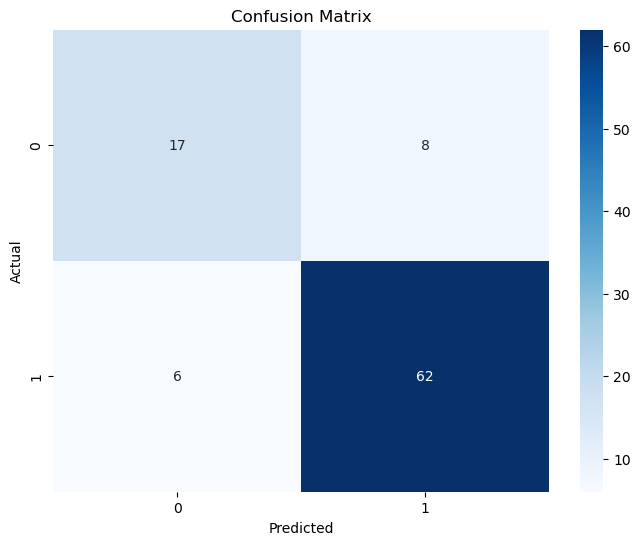

SVM Classifier Metrics:
Accuracy: 0.8494623655913979
Precision: 0.8463100247111467
Recall: 0.8494623655913979
F1 Score: 0.8474170172978027
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.89      0.91      0.90        68

    accuracy                           0.85        93
   macro avg       0.81      0.80      0.80        93
weighted avg       0.85      0.85      0.85        93



In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)




print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0))) 


# Train the SVM model
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


Before OverSampling, counts of label '1': 354
Before OverSampling, counts of label '0': 167 

After OverSampling, the shape of train_X: (708, 11)
After OverSampling, the shape of train_y: (708,) 

After OverSampling, counts of label '1': 354
After OverSampling, counts of label '0': 354


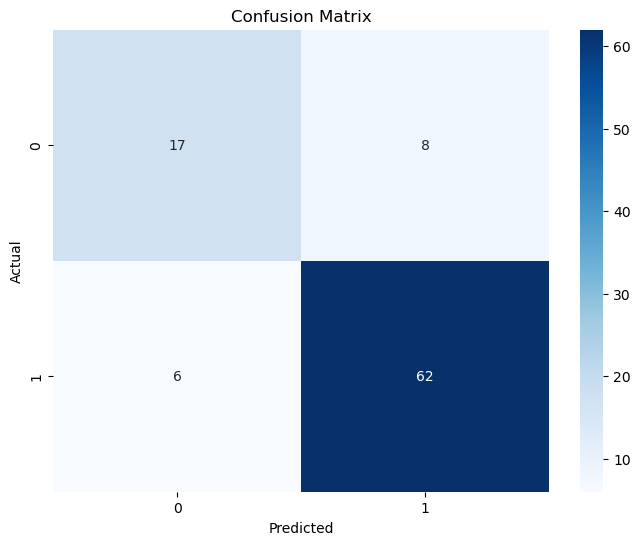

SVM Classifier Metrics:
Accuracy: 0.8494623655913979
Precision: 0.8463100247111467
Recall: 0.8494623655913979
F1 Score: 0.8474170172978027
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.89      0.91      0.90        68

    accuracy                           0.85        93
   macro avg       0.81      0.80      0.80        93
weighted avg       0.85      0.85      0.85        93



In [37]:
 from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)




print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0))) 


# Train the SVM model
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


In [38]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Initialize base classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Bagging classifier with Decision Tree as base estimator
bagging_dt_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)

# Initialize Voting classifier with Decision Tree and Random Forest as base estimators
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf)], voting='hard')

# Train classifiers
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
bagging_dt_clf.fit(x_train, y_train)
voting_clf.fit(x_train, y_train)

# Make predictions
dt_predictions = dt_clf.predict(x_test)
rf_predictions = rf_clf.predict(x_test)
bagging_dt_predictions = bagging_dt_clf.predict(x_test)
voting_predictions = voting_clf.predict(x_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Bagging Classifier with RF Tree Accuracy:", bagging_dt_accuracy)
print("Voting Classifier Accuracy:", voting_accuracy)

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Classifier Accuracy: 0.8064516129032258
Random Forest Classifier Accuracy: 0.8709677419354839
Bagging Classifier with RF Tree Accuracy: 0.8924731182795699
Voting Classifier Accuracy: 0.8064516129032258


In [39]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

 
# Initialize base estimator (Decision Tree)
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

rf_clf = RandomForestClassifier(max_depth=100, random_state=42)

svm_clf = SVC(random_state=42)


# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)
#adaboost_clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=100, random_state=42)


# Train AdaBoost classifier
adaboost_clf.fit(x_train, y_train)

# Make predictions
adaboost_predictions = adaboost_clf.predict(x_test)

# Evaluate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

print("AdaBoost Classifier Accuracy:", adaboost_accuracy)

AdaBoost Classifier Accuracy: 0.8924731182795699


C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [40]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Train LightGBM classifier
lgb_clf.fit(x_train, y_train)

# Make predictions
lgb_predictions = lgb_clf.predict(x_test)

# Evaluate accuracy
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

print("LightGBM Classifier Accuracy:", lgb_accuracy)

[LightGBM] [Info] Number of positive: 354, number of negative: 167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 521, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.679463 -> initscore=0.751303
[LightGBM] [Info] Start training from score 0.751303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [44]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize CatBoost classifier
catboost_clf = CatBoostClassifier(iterations=100, random_state=42, logging_level='Silent')

# Train CatBoost classifier
catboost_clf.fit(x_train, y_train)

# Make predictions
catboost_predictions = catboost_clf.predict(x_test)

# Evaluate accuracy
catboost_accuracy = accuracy_score(y_test, catboost_predictions)

print("CatBoost Classifier Accuracy:", catboost_accuracy)

CatBoost Classifier Accuracy: 0.8817204301075269
